# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_4:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


## 1.Importing some libraries

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os
#import ploty
#from plotly import plotly
#import plotly.offline as offline
#import plotly.graph_objs as go
#offline.init_notebook_mode()
from collections import Counter

## 2. Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')
print(project_data['project_subject_categories'])

0                         Literacy & Language
1           History & Civics, Health & Sports
2                             Health & Sports
3         Literacy & Language, Math & Science
4                              Math & Science
                         ...                 
109243    Literacy & Language, Math & Science
109244    Literacy & Language, Math & Science
109245    Literacy & Language, Math & Science
109246         Health & Sports, Special Needs
109247       Applied Learning, Math & Science
Name: project_subject_categories, Length: 109248, dtype: object


In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


# 3. Data Analysis Using EDA

Number of projects thar are approved for funding  92706 , ( 84.85830404217927 %)
Number of projects thar are not approved for funding  16542 , ( 15.141695957820739 %)


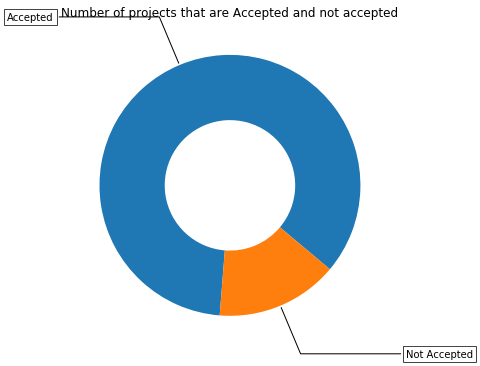

1    92706
0    16542
Name: project_is_approved, dtype: int64


In [5]:
# this code is taken from 
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py


y_value_counts = project_data['project_is_approved'].value_counts()
print("Number of projects thar are approved for funding ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of projects thar are not approved for funding ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Accepted", "Not Accepted"]

data = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Number of projects that are Accepted and not accepted")

plt.show()
print(y_value_counts )

### 4. Univariate Analysis: School State

In [6]:
# Pandas dataframe grouby count, mean: https://stackoverflow.com/a/19385591/4084039
#groupby--> ("school_state")--> will group the same state together 

temp = pd.DataFrame(project_data.groupby("school_state")["project_is_approved"].apply(np.mean)).reset_index()

# if you have data which contain only 0 and 1, then the mean = percentage (think about it)
temp.columns = ['state_code', 'num_proposals'] 

print(temp)

   state_code  num_proposals
0          AK       0.840580
1          AL       0.854711
2          AR       0.831268
3          AZ       0.838379
4          CA       0.858136
5          CO       0.841584
6          CT       0.868912
7          DC       0.802326
8          DE       0.897959
9          FL       0.831690
10         GA       0.840020
11         HI       0.856016
12         IA       0.852853
13         ID       0.835498
14         IL       0.852874
15         IN       0.845038
16         KS       0.839117
17         KY       0.863497
18         LA       0.831245
19         MA       0.860193
20         MD       0.838838
21         ME       0.847525
22         MI       0.845302
23         MN       0.857616
24         MO       0.854814
25         MS       0.845049
26         MT       0.816327
27         NC       0.855038
28         ND       0.888112
29         NE       0.841424
30         NH       0.873563
31         NJ       0.843987
32         NM       0.859964
33         NV 

In [7]:
# https://www.csi.cuny.edu/sites/default/files/pdf/administration/ops/2letterstabbrev.pdf
temp.sort_values(by=['num_proposals'], inplace=True)
print("States with lowest % approvals")
print(temp.head(5))
print('*'*50)
print("States with highest % approvals") 
print(temp.tail(5))

States with lowest % approvals
   state_code  num_proposals
46         VT       0.800000
7          DC       0.802326
43         TX       0.813142
26         MT       0.816327
18         LA       0.831245
**************************************************
States with highest % approvals
   state_code  num_proposals
30         NH       0.873563
35         OH       0.875152
47         WA       0.876178
28         ND       0.888112
8          DE       0.897959


In [8]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2='project_is_approved', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Projects')
    plt.title('% of projects aproved state wise')
    plt.xticks(ind, list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('total', 'accepted'))
    plt.show()

In [9]:
def univariate_barplots(data, col1, col2='project_is_approved', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(project_data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'total':'count'})).reset_index()['total']
    temp['Avg'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'Avg':'mean'})).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

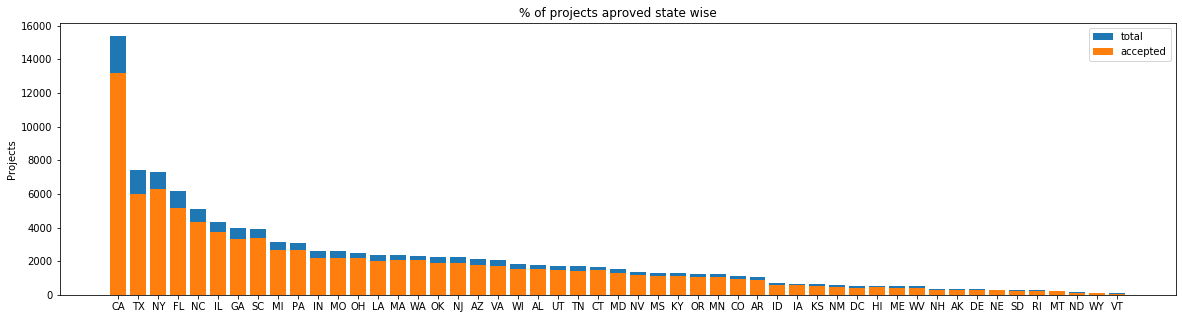

   school_state  project_is_approved  total       Avg
4            CA                13205  15388  0.858136
43           TX                 6014   7396  0.813142
34           NY                 6291   7318  0.859661
9            FL                 5144   6185  0.831690
27           NC                 4353   5091  0.855038
   school_state  project_is_approved  total       Avg
39           RI                  243    285  0.852632
26           MT                  200    245  0.816327
28           ND                  127    143  0.888112
50           WY                   82     98  0.836735
46           VT                   64     80  0.800000


In [10]:
univariate_barplots(project_data, 'school_state', 'project_is_approved', False)

__Every state is having more than 80% success rate in approval__

### 5. Univariate Analysis: teacher_prefix

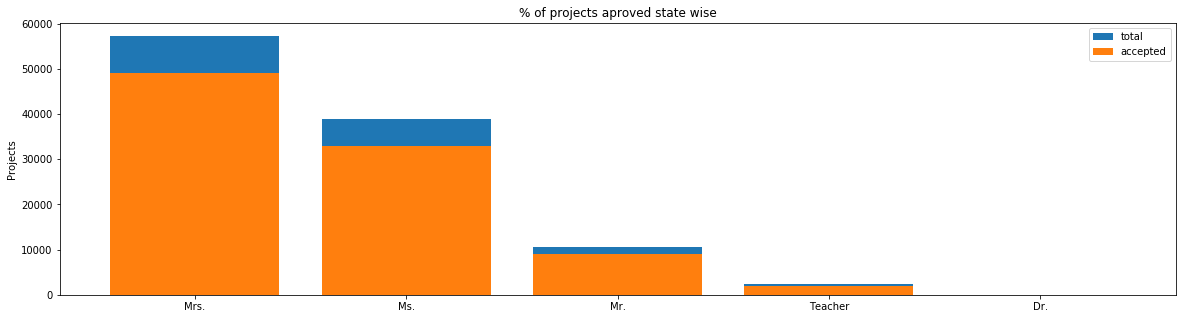

  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308
  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308


In [11]:
univariate_barplots(project_data, 'teacher_prefix', 'project_is_approved' , top=False)

### 6. Univariate Analysis: project_grade_category

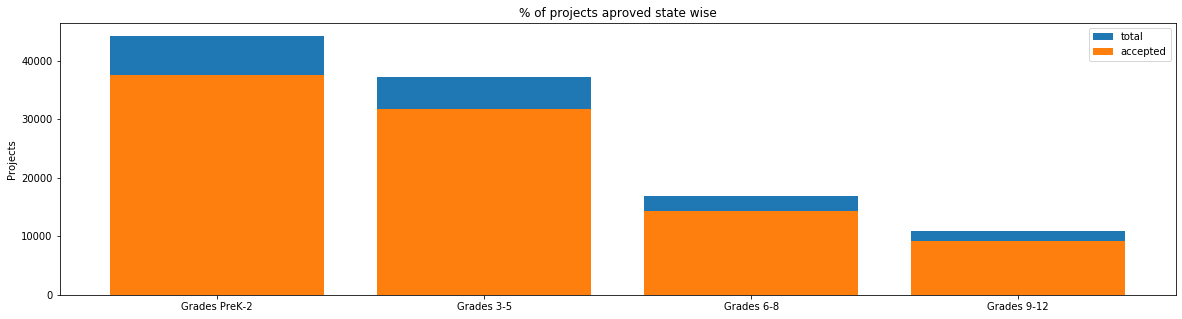

  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636
  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636


In [12]:
univariate_barplots(project_data, 'project_grade_category', 'project_is_approved', top=False)

### 7. Univariate Analysis: project_subject_categories

In [13]:
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace(' The ','')
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace(' ','')
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace('&','_')
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace(',','_')
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.lower()


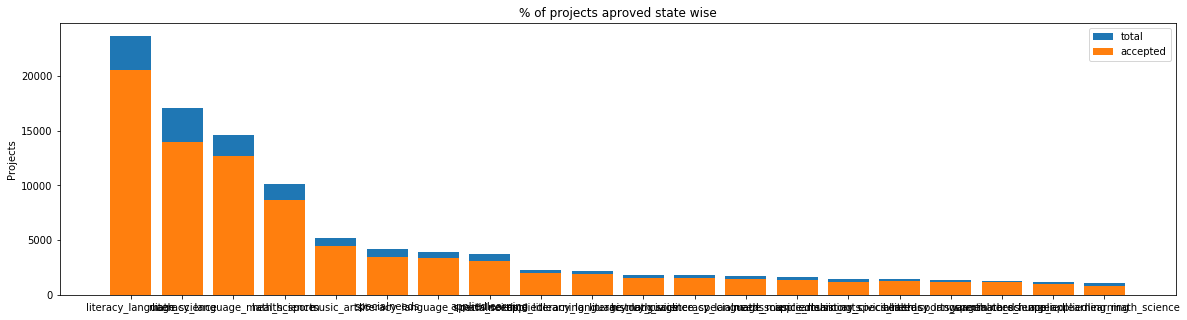

        project_subject_categories  project_is_approved  total       Avg
24               literacy_language                20520  23655  0.867470
32                    math_science                13991  17072  0.819529
28  literacy_language_math_science                12725  14636  0.869432
8                    health_sports                 8640  10177  0.848973
40                      music_arts                 4429   5180  0.855019
          project_subject_categories  project_is_approved  total       Avg
19  history_civics_literacy_language                 1271   1421  0.894441
14        health_sports_specialneeds                 1215   1391  0.873472
50                warmth_care_hunger                 1212   1309  0.925898
33      math_science_appliedlearning                 1019   1220  0.835246
4       appliedlearning_math_science                  855   1052  0.812738


In [14]:
univariate_barplots(project_data, 'project_subject_categories', 'project_is_approved', top=20)

In [15]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['project_subject_categories'].values:
    my_counter.update(word.split())
print(my_counter)

Counter({'literacy_language': 23655, 'math_science': 17072, 'literacy_language_math_science': 14636, 'health_sports': 10177, 'music_arts': 5180, 'specialneeds': 4226, 'literacy_language_specialneeds': 3961, 'appliedlearning': 3771, 'math_science_literacy_language': 2289, 'appliedlearning_literacy_language': 2191, 'history_civics': 1851, 'math_science_specialneeds': 1840, 'literacy_language_music_arts': 1757, 'math_science_music_arts': 1642, 'appliedlearning_specialneeds': 1467, 'history_civics_literacy_language': 1421, 'health_sports_specialneeds': 1391, 'warmth_care_hunger': 1309, 'math_science_appliedlearning': 1220, 'appliedlearning_math_science': 1052, 'literacy_language_history_civics': 809, 'health_sports_literacy_language': 803, 'appliedlearning_music_arts': 758, 'math_science_history_civics': 652, 'literacy_language_appliedlearning': 636, 'appliedlearning_health_sports': 608, 'math_science_health_sports': 414, 'history_civics_math_science': 322, 'history_civics_music_arts': 312

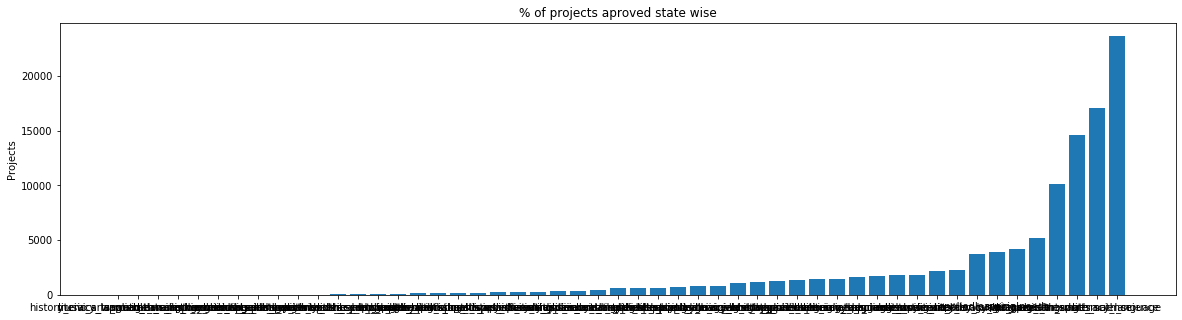

{'history_civics_warmth_care_hunger': 1, 'music_arts_warmth_care_hunger': 2, 'literacy_language_warmth_care_hunger': 9, 'music_arts_appliedlearning': 10, 'appliedlearning_warmth_care_hunger': 10, 'math_science_warmth_care_hunger': 11, 'history_civics_health_sports': 13, 'music_arts_history_civics': 18, 'music_arts_health_sports': 19, 'health_sports_warmth_care_hunger': 23, 'specialneeds_warmth_care_hunger': 23, 'specialneeds_health_sports': 42, 'history_civics_appliedlearning': 42, 'health_sports_history_civics': 43, 'literacy_language_health_sports': 72, 'music_arts_specialneeds': 138, 'health_sports_music_arts': 155, 'appliedlearning_history_civics': 178, 'health_sports_appliedlearning': 192, 'history_civics_specialneeds': 252, 'health_sports_math_science': 271, 'specialneeds_music_arts': 302, 'history_civics_music_arts': 312, 'history_civics_math_science': 322, 'math_science_health_sports': 414, 'appliedlearning_health_sports': 608, 'literacy_language_appliedlearning': 636, 'math_sc

In [16]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved state wise')
plt.xticks(ind, list(sorted_cat_dict.keys()))
plt.show()
print(sorted_cat_dict)

In [17]:
for i, j in sorted_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

history_civics_warmth_care_hunger :         1
music_arts_warmth_care_hunger :         2
literacy_language_warmth_care_hunger :         9
music_arts_appliedlearning :        10
appliedlearning_warmth_care_hunger :        10
math_science_warmth_care_hunger :        11
history_civics_health_sports :        13
music_arts_history_civics :        18
music_arts_health_sports :        19
health_sports_warmth_care_hunger :        23
specialneeds_warmth_care_hunger :        23
specialneeds_health_sports :        42
history_civics_appliedlearning :        42
health_sports_history_civics :        43
literacy_language_health_sports :        72
music_arts_specialneeds :       138
health_sports_music_arts :       155
appliedlearning_history_civics :       178
health_sports_appliedlearning :       192
history_civics_specialneeds :       252
health_sports_math_science :       271
specialneeds_music_arts :       302
history_civics_music_arts :       312
history_civics_math_science :       322
math_scien

### 9. Univariate Analysis: project_subject_subcategories

In [18]:
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace(' The ','')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace(' ','')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace('&','_')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace(',','_')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.lower()


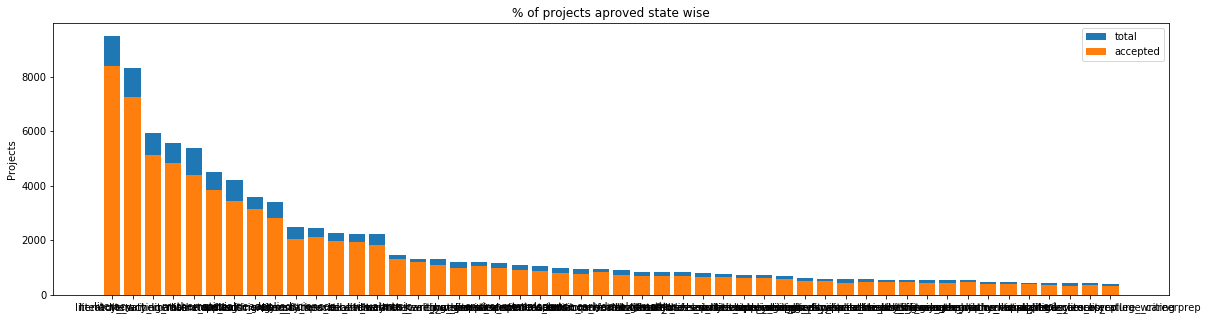

      project_subject_subcategories  project_is_approved  total       Avg
317                        literacy                 8371   9486  0.882458
319            literacy_mathematics                 7260   8325  0.872072
331  literature_writing_mathematics                 5140   5923  0.867803
318     literacy_literature_writing                 4823   5571  0.865733
342                     mathematics                 4385   5379  0.815207
          project_subject_subcategories  project_is_approved  total       Avg
173       environmentalscience_literacy                  389    444  0.876126
186                                 esl                  349    421  0.828979
79                   college_careerprep                  343    421  0.814727
17   appliedsciences_literature_writing                  361    420  0.859524
3    appliedsciences_college_careerprep                  330    405  0.814815


In [19]:
univariate_barplots(project_data, 'project_subject_subcategories', 'project_is_approved', top=50)

In [20]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['project_subject_subcategories'].values:
    my_counter.update(word.split())

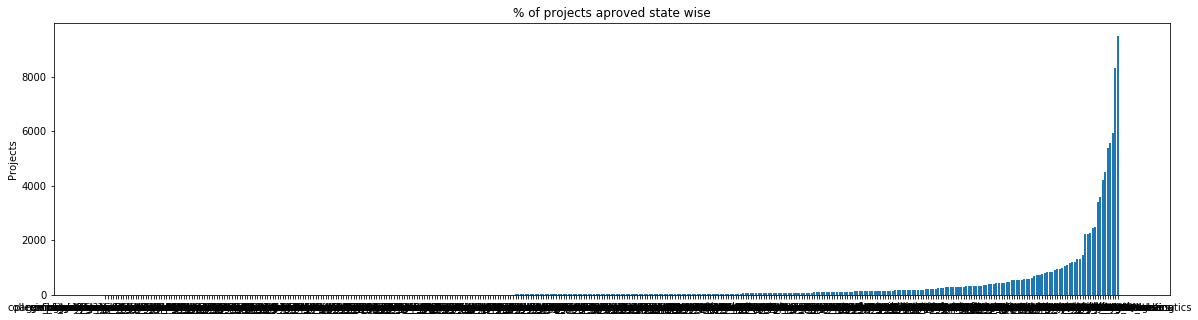

In [21]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_sub_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_sub_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved state wise')
plt.xticks(ind, list(sorted_sub_cat_dict.keys()))
plt.show()

In [22]:
for i, j in sorted_sub_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

gym_fitness_parentinvolvement :         1
communityservice_gym_fitness :         1
college_careerprep_warmth_care_hunger :         1
economics_other      :         1
parentinvolvement_warmth_care_hunger :         1
communityservice_music :         1
gym_fitness_socialsciences :         1
parentinvolvement_teamsports :         1
civics_government_nutritioneducation :         1
financialliteracy_foreignlanguages :         1
economics_nutritioneducation :         1
economics_music      :         1
other_warmth_care_hunger :         1
communityservice_financialliteracy :         1
extracurricular_financialliteracy :         1
gym_fitness_warmth_care_hunger :         1
literature_writing_nutritioneducation :         1
history_geography_warmth_care_hunger :         1
civics_government_parentinvolvement :         1
esl_teamsports       :         1
financialliteracy_performingarts :         1
esl_economics        :         1
civics_government_foreignlanguages :         1
economics_foreignlangu

### 10. Univariate Analysis: Text features (Title)

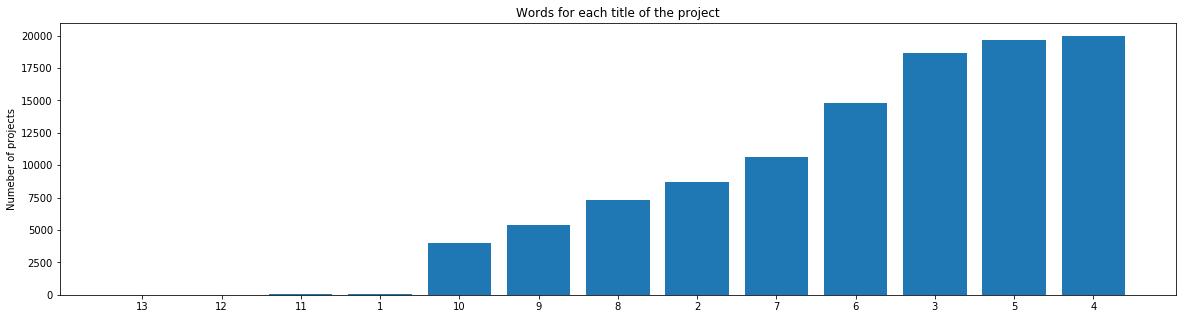

In [23]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = project_data['project_title'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Numeber of projects')
plt.title('Words for each title of the project')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

In [24]:
approved_word_count = project_data[project_data['project_is_approved']==1]['project_title'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = project_data[project_data['project_is_approved']==0]['project_title'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

#### using  Boxplot ,we have to see that how the number of words in 'project title'  effects the acceptance of project

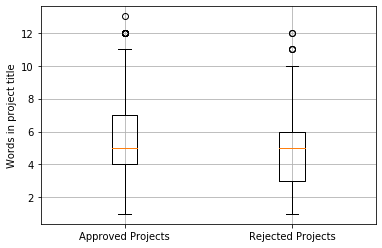

In [25]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html

plt.boxplot([approved_word_count, rejected_word_count])
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

##### in above figure,each box, the central mark is the median, the edges of the box are the lower hinge (defined as the 25th percentile) and the upper hinge (the 75th percentile)
##### number of words in approved projects are higher  than rejected projects

###### Now we analyse the above part using PDF

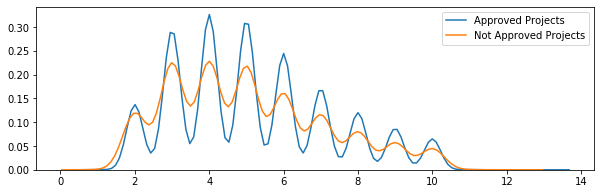

In [26]:
plt.figure(figsize=(10,3))
sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.legend()
plt.show()

### 11. Univariate Analysis: Text features (Project Essay's)

In [27]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

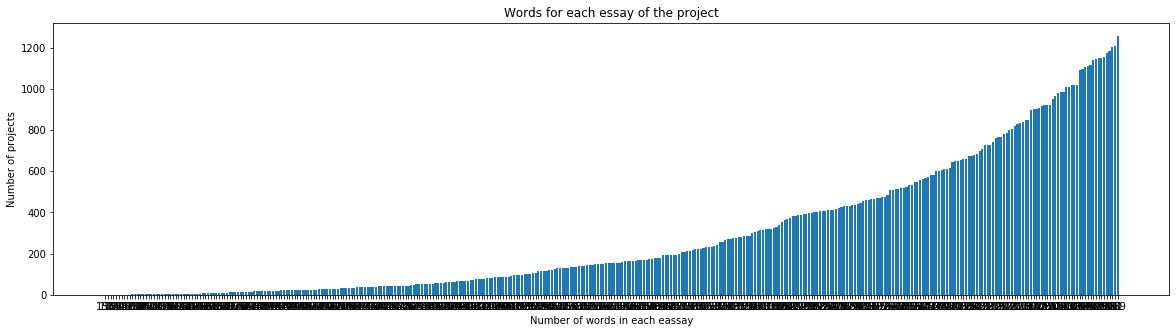

In [28]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = project_data['essay'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Number of projects')
plt.xlabel('Number of words in each eassay')
plt.title('Words for each essay of the project')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

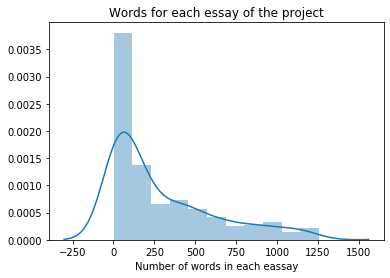

In [29]:
sns.distplot(word_count.values)
plt.title('Words for each essay of the project')
plt.xlabel('Number of words in each eassay')
plt.show()


In [30]:
approved_word_count = project_data[project_data['project_is_approved']==1]['essay'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = project_data[project_data['project_is_approved']==0]['essay'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

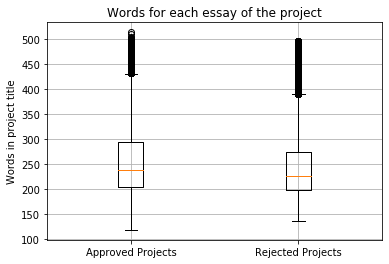

In [31]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_word_count, rejected_word_count])
plt.title('Words for each essay of the project')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

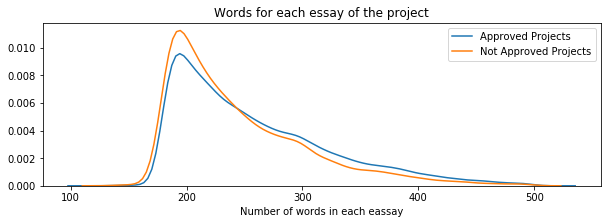

In [32]:
plt.figure(figsize=(10,3))
sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.title('Words for each essay of the project')
plt.xlabel('Number of words in each eassay')
plt.legend()
plt.show()

##### in above figure,number of words in essay for approved project is higher than rejected projects.

### 12. Univariate Analysis: Cost per project

In [33]:
# we get the cost of the project using resource.csv file
resource_data.head(2)

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [34]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,essay,price,quantity
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,literacy_language,esl_literacy,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,My students are English learners that are work...,154.6,23
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,history_civics_health_sports,civics_government_teamsports,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,Our students arrive to our school eager to lea...,299.0,1


In [35]:
approved_price = project_data[project_data['project_is_approved']==1]['price'].values


rejected_price = project_data[project_data['project_is_approved']==0]['price'].values

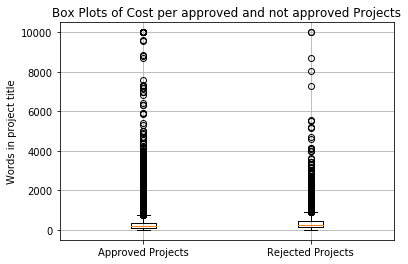

In [36]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_price, rejected_price])
plt.title('Box Plots of Cost per approved and not approved Projects')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

##### in abve figure, box plot providing not so much information...here boxes are so small to consider

##### PDf, to see the above part

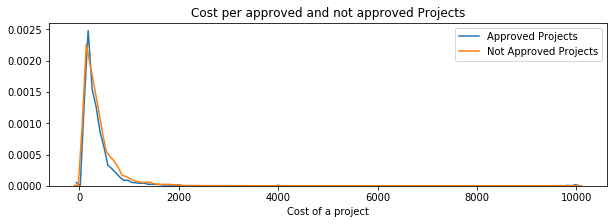

In [37]:
plt.figure(figsize=(10,3))
sns.distplot(approved_price, hist=False, label="Approved Projects")
sns.distplot(rejected_price, hist=False, label="Not Approved Projects")
plt.title('Cost per approved and not approved Projects')
plt.xlabel('Cost of a project')
plt.legend()
plt.show()

##### in above figure,graph for approved projects and not approved approxmatly overlapping,due to which we are not getting so much information from it

In [38]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]

for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(approved_price,i), 3), np.round(np.percentile(rejected_price,i), 3)])
print(x)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        0.66       |          1.97         |
|     5      |       13.59       |          41.9         |
|     10     |       33.88       |         73.67         |
|     15     |        58.0       |         99.109        |
|     20     |       77.38       |         118.56        |
|     25     |       99.95       |        140.892        |
|     30     |       116.68      |         162.23        |
|     35     |      137.232      |        184.014        |
|     40     |       157.0       |        208.632        |
|     45     |      178.265      |        235.106        |
|     50     |       198.99      |        263.145        |
|     55     |       223.99      |         292.61        |
|     60     |       255.63      |        325.144        |
|     65     |      285.412      |         362.39       

<h3><font color='red'>13. Univariate Analysis: project_resource_summary</font></h3>

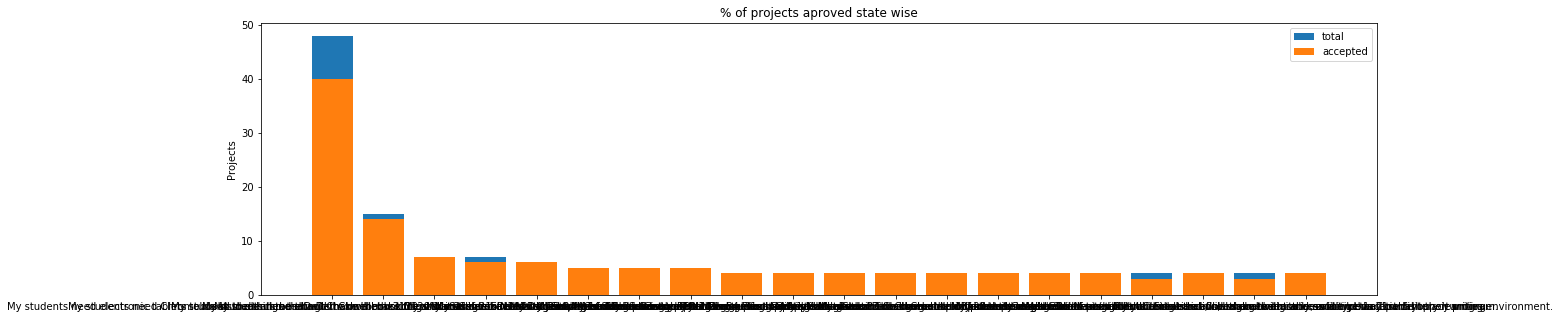

                                project_resource_summary  project_is_approved  \
56539  My students need electronic tablets to do all ...                   40   
10193  My students need Chromebooks to do all the thi...                   14   
18828  My students need a Dell Chromebook 3120 and a ...                    7   
51417  My students need chromebooks to do all the thi...                    6   
18819  My students need a Dell Chromebook 3120 11 6 C...                    6   

       total       Avg  
56539     48  0.833333  
10193     15  0.933333  
18828      7  1.000000  
51417      7  0.857143  
18819      6  1.000000  
                                project_resource_summary  project_is_approved  \
3452   My students need 3 Chromebook computers to eng...                    4   
10510  My students need Chromebooks to open the doors...                    3   
8058   My students need 8 Hokki Stools to allow them ...                    4   
91082  My students need tablets to do a

In [39]:

univariate_barplots(project_data, 'project_resource_summary', 'project_is_approved', top=20)

##### 'project_resource_summary' is not so important feature.by looking at figure ,we can observe this

## checking for missing values in data.

In [40]:
project_data.isnull().sum()

Unnamed: 0                                           0
id                                                   0
teacher_id                                           0
teacher_prefix                                       3
school_state                                         0
project_submitted_datetime                           0
project_grade_category                               0
project_subject_categories                           0
project_subject_subcategories                        0
project_title                                        0
project_essay_1                                      0
project_essay_2                                      0
project_essay_3                                 105490
project_essay_4                                 105490
project_resource_summary                             0
teacher_number_of_previously_posted_projects         0
project_is_approved                                  0
essay                                                0
price     

#### three missing value are present in teacher_prefix

In [41]:
project_data['teacher_prefix'].value_counts()

Mrs.       57269
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Name: teacher_prefix, dtype: int64

#### here "Mrs." count is high (mrs is most freqent title ) therefore we put mrs at null palace..

In [42]:
project_data['teacher_prefix']=project_data['teacher_prefix'].fillna('Mrs.')

In [43]:
project_data['teacher_prefix'].value_counts()

Mrs.       57272
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Name: teacher_prefix, dtype: int64

#For all projects with project_submitted_datetime of 2016-05-17 and later, 
#the values of project_essay_3 and project_essay_4 will be NaN.

# so i will like to drop these two columns

In [44]:
project_data=project_data.drop(["project_essay_3","project_essay_4"],axis=1)

In [45]:
project_data

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,essay,price,quantity
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,literacy_language,esl_literacy,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",My students need opportunities to practice beg...,0,0,My students are English learners that are work...,154.60,23
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,history_civics_health_sports,civics_government_teamsports,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,My students need a projector to help with view...,7,1,Our students arrive to our school eager to lea...,299.00,1
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,health_sports,health_wellness_teamsports,Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,"My students need shine guards, athletic socks,...",1,0,"\r\n\""True champions aren't always the ones th...",516.85,22
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,literacy_language_math_science,literacy_mathematics,Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,My students need to engage in Reading and Math...,4,1,I work at a unique school filled with both ESL...,232.90,4
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,math_science,mathematics,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",My students need hands on practice in mathemat...,1,1,Our second grade classroom next year will be m...,67.98,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109243,38267,p048540,fadf72d6cd83ce6074f9be78a6fcd374,Mr.,MO,2016-06-17 12:02:31,Grades PreK-2,literacy_language_math_science,literature_writing_mathematics,Privacy Shields Help Promote Independent Thinking,Welcome to Mr. Ramos's 2nd grade classroom! We...,I would like to start preparing my second grad...,My students need these privacy partitions to h...,0,1,Welcome to Mr. Ramos's 2nd grade classroom! We...,59.98,8
109244,169142,p166281,1984d915cc8b91aa16b4d1e6e39296c6,Ms.,NJ,2017-01-11 12:49:39,Grades PreK-2,literacy_language_math_science,literacy_mathematics,Technology in Our Classroom,"Every morning, we start our day with our core ...","In this technological age, we need to give our...",My students need two iPad's and protective cas...,0,1,"Every morning, we start our day with our core ...",846.32,4
109245,143653,p155633,cdbfd04aa041dc6739e9e576b1fb1478,Mrs.,NJ,2016-08-25 17:11:32,Grades PreK-2,literacy_language_math_science,literacy_mathematics,2016/2017 Beginning of the Year Basics,This is a great group of sharing and caring st...,"My students learn about special events, holida...",My students need giant comfy pillows in order ...,3,1,This is a great group of sharing and caring st...,239.96,4
109246,164599,p206114,6d5675dbfafa1371f0e2f6f1b716fe2d,Mrs.,NY,2016-07-29 17:53:15,Grades 3-5,health_sports_specialneeds,health_wellness_specialneeds,Flexible Seating in Inclusive Classroom,Our students live in a small rural community. ...,Flexible classroom seating has been researched...,My students need flexible seating options: bea...,0,1,Our students live in a small rural community. ...,73.05,16


In [46]:
project_data.isnull().sum()

Unnamed: 0                                      0
id                                              0
teacher_id                                      0
teacher_prefix                                  0
school_state                                    0
project_submitted_datetime                      0
project_grade_category                          0
project_subject_categories                      0
project_subject_subcategories                   0
project_title                                   0
project_essay_1                                 0
project_essay_2                                 0
project_resource_summary                        0
teacher_number_of_previously_posted_projects    0
project_is_approved                             0
essay                                           0
price                                           0
quantity                                        0
dtype: int64

#### now we can see that here is no  missing value

# Applying Preprocessing to clean the data (removing "the","&","-",space,stop words)

## 1. Preprocessing Categorical Features: project_grade_category

In [47]:
project_data['project_grade_category'].value_counts()

Grades PreK-2    44225
Grades 3-5       37137
Grades 6-8       16923
Grades 9-12      10963
Name: project_grade_category, dtype: int64

we need to remove the spaces, replace the '-' with '_' and convert all the letters to small

In [48]:
# https://stackoverflow.com/questions/36383821/pandas-dataframe-apply-function-to-column-strings-based-on-other-column-value
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace(' ','_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace('-','_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.lower()
project_data['project_grade_category'].value_counts()

grades_prek_2    44225
grades_3_5       37137
grades_6_8       16923
grades_9_12      10963
Name: project_grade_category, dtype: int64

## 2. Preprocessing Categorical Features: project_subject_categories

In [49]:
project_data['project_subject_categories'].value_counts()

literacy_language                       23655
math_science                            17072
literacy_language_math_science          14636
health_sports                           10177
music_arts                               5180
specialneeds                             4226
literacy_language_specialneeds           3961
appliedlearning                          3771
math_science_literacy_language           2289
appliedlearning_literacy_language        2191
history_civics                           1851
math_science_specialneeds                1840
literacy_language_music_arts             1757
math_science_music_arts                  1642
appliedlearning_specialneeds             1467
history_civics_literacy_language         1421
health_sports_specialneeds               1391
warmth_care_hunger                       1309
math_science_appliedlearning             1220
appliedlearning_math_science             1052
literacy_language_history_civics          809
health_sports_literacy_language   

remove spaces, 'the'
replace '&' with '_', and ',' with '_'

In [50]:
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace(' The ','')
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace(' ','')
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace('&','_')
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace(',','_')
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.lower()


# 3. Preprocessing Categorical Features: teacher_prefix

In [51]:
project_data['teacher_prefix'].value_counts()

Mrs.       57272
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Name: teacher_prefix, dtype: int64

Remove '.'
convert all the chars to small

In [52]:
project_data['teacher_prefix'] = project_data['teacher_prefix'].str.replace('.','')
project_data['teacher_prefix'] = project_data['teacher_prefix'].str.lower()
project_data['teacher_prefix'].value_counts()

mrs        57272
ms         38955
mr         10648
teacher     2360
dr            13
Name: teacher_prefix, dtype: int64

# 4. Preprocessing Categorical Features: project_subject_subcategories

In [53]:
project_data['project_subject_subcategories'].value_counts()

literacy                                 9486
literacy_mathematics                     8325
literature_writing_mathematics           5923
literacy_literature_writing              5571
mathematics                              5379
                                         ... 
parentinvolvement_warmth_care_hunger        1
civics_government_foreignlanguages          1
communityservice_financialliteracy          1
college_careerprep_warmth_care_hunger       1
gym_fitness_warmth_care_hunger              1
Name: project_subject_subcategories, Length: 401, dtype: int64

In [54]:
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace(' The ','')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace(' ','')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace('&','_')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace(',','_')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.lower()


# 5. Preprocessing Categorical Features: school_state

In [55]:
project_data['school_state'].value_counts()

CA    15388
TX     7396
NY     7318
FL     6185
NC     5091
IL     4350
GA     3963
SC     3936
MI     3161
PA     3109
IN     2620
MO     2576
OH     2467
LA     2394
MA     2389
WA     2334
OK     2276
NJ     2237
AZ     2147
VA     2045
WI     1827
AL     1762
UT     1731
TN     1688
CT     1663
MD     1514
NV     1367
MS     1323
KY     1304
OR     1242
MN     1208
CO     1111
AR     1049
ID      693
IA      666
KS      634
NM      557
DC      516
HI      507
ME      505
WV      503
NH      348
AK      345
DE      343
NE      309
SD      300
RI      285
MT      245
ND      143
WY       98
VT       80
Name: school_state, dtype: int64

convert all of them into small letters

In [56]:
project_data['school_state'] = project_data['school_state'].str.lower()
project_data['school_state'].value_counts()

ca    15388
tx     7396
ny     7318
fl     6185
nc     5091
il     4350
ga     3963
sc     3936
mi     3161
pa     3109
in     2620
mo     2576
oh     2467
la     2394
ma     2389
wa     2334
ok     2276
nj     2237
az     2147
va     2045
wi     1827
al     1762
ut     1731
tn     1688
ct     1663
md     1514
nv     1367
ms     1323
ky     1304
or     1242
mn     1208
co     1111
ar     1049
id      693
ia      666
ks      634
nm      557
dc      516
hi      507
me      505
wv      503
nh      348
ak      345
de      343
ne      309
sd      300
ri      285
mt      245
nd      143
wy       98
vt       80
Name: school_state, dtype: int64

# 6. Preprocessing Categorical Features: project_title

In [57]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [58]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [59]:
project_data['project_title'].head(5)

0     Educational Support for English Learners at Home
1                Wanted: Projector for Hungry Learners
2    Soccer Equipment for AWESOME Middle School Stu...
3                               Techie Kindergarteners
4                               Interactive Math Tools
Name: project_title, dtype: object

In [60]:
print("printing some random reviews")
print(9, project_data['project_title'].values[9])
print(34, project_data['project_title'].values[34])
print(147, project_data['project_title'].values[147])

printing some random reviews
9 Just For the Love of Reading--\r\nPure Pleasure
34 \"Have A Ball!!!\"
147 Who needs a Chromebook?\r\nWE DO!!


In [61]:
# Combining all the above stundents 
from tqdm import tqdm
def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(i for i in sent.split() if i.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [62]:
preprocessed_titles = preprocess_text(project_data['project_title'].values)

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:05<00:00, 18670.58it/s]


In [63]:
print("printing some random reviews")
print(9, preprocessed_titles[9])
print(34, preprocessed_titles[34])
print(147, preprocessed_titles[147])

printing some random reviews
9 love reading pure pleasure
34 ball
147 needs chromebook


# 7. Preprocessing Categorical Features: essay

In [64]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) 
                        

In [65]:
print("printing some random essay")
print(9, project_data['essay'].values[9])
print('-'*50)
print(34, project_data['essay'].values[34])
print('-'*50)
print(147, project_data['essay'].values[147])

printing some random essay
9 Over 95% of my students are on free or reduced lunch.  I have a few who are homeless, but despite that, they come to school with an eagerness to learn.  My students are inquisitive eager learners who  embrace the challenge of not having great books and other resources  every day.  Many of them are not afforded the opportunity to engage with these big colorful pages of a book on a regular basis at home and they don't travel to the public library.  \r\nIt is my duty as a teacher to do all I can to provide each student an opportunity to succeed in every aspect of life. \r\nReading is Fundamental! My students will read these books over and over again while boosting their comprehension skills. These books will be used for read alouds, partner reading and for Independent reading. \r\nThey will engage in reading to build their \"Love for Reading\" by reading for pure enjoyment. They will be introduced to some new authors as well as some old favorites. I want my st

In [66]:
preprocessed_essays = preprocess_text(project_data['essay'].values)

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [01:59<00:00, 914.90it/s]


In [67]:
print("printing some random essay")
print(9, preprocessed_essays[9])
print('-'*50)
print(34, preprocessed_essays[34])
print('-'*50)
print(147, preprocessed_essays[147])

printing some random essay
9 95 students free reduced lunch homeless despite come school eagerness learn students inquisitive eager learners embrace challenge not great books resources every day many not afforded opportunity engage big colorful pages book regular basis home not travel public library duty teacher provide student opportunity succeed every aspect life reading fundamental students read books boosting comprehension skills books used read alouds partner reading independent reading engage reading build love reading reading pure enjoyment introduced new authors well old favorites want students ready 21st century know pleasure holding good hard back book hand nothing like good book read students soar reading consideration generous funding contribution help build stamina prepare 3rd grade thank much reading proposal
--------------------------------------------------
34 students mainly come extremely low income families majority come homes parents work full time students school 7

#### here we use mainly 
####  1.school_state
#### 2.teacher_prefix
#### 3.essay
####

#### 4.project_subject_categories
#### 5.project_grade_subcategories

#### 6. teacher_number_of_previously_posted_projects
#### 7.price
#### optional project_resource_summary,project_title, project_grade_category



### we can apply feature engg technique like Sentiment score

#Sentiment analysis (or opinion mining) is a natural language processing 
#technique used to determine whether data is positive, negative or neutral. 
#Sentiment analysis is often performed on textual data to help businesses monitor brand and
#product sentiment in customer feedback, and understand customer needs.

# Set 1: categorical(instead of one hot encoding, try response coding: use probability values), numerical features + eassay (TFIDF)
# Set 2: categorical(instead of one hot encoding, try response coding: use probability values), numerical features + eassay (TFIDF W2V)

In [68]:
y = project_data['project_is_approved'].values
X = project_data.drop(['project_is_approved'], axis=1)
X.shape


(109248, 17)

In [69]:
y.shape

(109248,)

In [70]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)


In [71]:
print(X_train.shape)

(73196, 17)


In [72]:
print(y_train.shape)

(73196,)


# set 1:

## preprocessed_eassay(TFIDF)

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf_essay = TfidfVectorizer(min_df=10)
X_train_essay_tfidf = vectorizer_tfidf_essay.fit_transform((X_train["essay"]))
X_test_essay_tfidf = vectorizer_tfidf_essay.transform((X_test["essay"]))

print("Shape of matrix  X_train_essay_tfidf after one hot encodig ",X_train_essay_tfidf.shape)
print("Shape of matrix  X_test_essay_tfidf after one hot encodig ",X_test_essay_tfidf.shape)




Shape of matrix  X_train_essay_tfidf after one hot encodig  (73196, 14656)
Shape of matrix  X_test_essay_tfidf after one hot encodig  (36052, 14656)


### Responce encoding

In [74]:



def get_feature_dict(feature,df):
    value_count=X_train[feature].value_counts()
    gv_dict=dict()
    for i,denominator in value_count.items():
        vec=[]
        for k in range(0,2):
            cls_cnt=X_train.loc[(y_train==k) & (X_train[feature]==i)]
            vec.append(cls_cnt.shape[0]/denominator)
        gv_dict[i]=vec
    return gv_dict

def get_gv_feature(feature,df):
    gv_dict=get_feature_dict(feature,df)
    value_count=X_train[feature].value_counts()
    gv_fea=[]
    for index,row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([0.5,0.5])
    return gv_fea

### Response encoding on school state

In [75]:
X_train_school_state=np.array(get_gv_feature('school_state',X_train))
X_test_school_state=np.array(get_gv_feature('school_state',X_test))                             
print(X_train_school_state.shape,y_train.shape)
print(X_test_school_state.shape, y_test.shape)

(73196, 2) (73196,)
(36052, 2) (36052,)


## Response encoding on teacher_prefix

In [76]:
X_train_teacher_prefix=np.array(get_gv_feature('teacher_prefix',X_train))
X_test_teacher_prefix=np.array(get_gv_feature('teacher_prefix',X_test))       
print("After Response coding :")
print(X_train_teacher_prefix.shape, y_train.shape)

print(X_test_teacher_prefix.shape, y_test.shape)

After Response coding :
(73196, 2) (73196,)
(36052, 2) (36052,)


## Response encoding on project_subject_categories

In [77]:
X_train_project_categories=np.array(get_gv_feature('project_subject_categories',X_train))
X_test_project_categories=np.array(get_gv_feature('project_subject_categories',X_test))
print(X_train_project_categories.shape,y_train.shape)
print(X_test_project_categories.shape,y_test.shape)

(73196, 2) (73196,)
(36052, 2) (36052,)


## Response encoding on project_subject_categories

In [78]:
X_train_project_subcategories=np.array(get_gv_feature('project_subject_categories',X_train))
X_test_project_subcategories=np.array(get_gv_feature('project_subject_categories',X_test))
print(X_train_project_subcategories.shape,y_train.shape)
print(X_test_project_subcategories.shape,y_test.shape)

(73196, 2) (73196,)
(36052, 2) (36052,)


## encoding categorical features: price

#### Normalizing the  data.
#### helps in getting rid of scale 
#### Now our data lies between [0,1]

In [79]:
from sklearn.preprocessing import Normalizer
normalizer_price = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer_price.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer_price.transform(X_train['price'].values.reshape(-1,1))

X_test_price_norm = normalizer_price.transform(X_test['price'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)

print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


## encoding categorical features: teacher_number_of_previously_posted_projects¶

#### Normalizing the  data.
#### helps in getting rid of scale 
#### Now our data lies between [0,1]

In [80]:
from sklearn.preprocessing import Normalizer
normalizer_posted_projects= Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer_posted_projects.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_posted_projects = normalizer_posted_projects.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_test_posted_projects = normalizer_posted_projects.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_posted_projects.shape, y_train.shape)

print(X_test_posted_projects.shape, y_test.shape)
print("="*100)

After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


## Concatinating all the features

In [81]:
from scipy.sparse import hstack#stacking it horizentally
X_train_final=hstack((X_train_essay_tfidf ,X_train_school_state,X_train_teacher_prefix,X_train_project_categories,X_train_project_subcategories,X_train_price_norm,X_train_posted_projects)).tocsr()


X_test_final=hstack((X_test_essay_tfidf ,X_test_school_state,X_test_teacher_prefix,X_test_project_categories,X_test_project_subcategories,X_test_price_norm,X_test_posted_projects)).tocsr()

print(X_train_final.shape,y_train.shape)
print(X_test_final.shape,y_test.shape)

(73196, 14666) (73196,)
(36052, 14666) (36052,)


## For ploting confusion matrices

In [82]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
   
    A =(((C.T)/(C.sum(axis=1))).T)
   
    B =(C/C.sum(axis=0))
    
    labels = [0,1]
    
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(5,5))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(5,5))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(5,5))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

### Base Model: NB

The base model
Once the dataset is uploaded, we want to create the first model. 
We will then evaluate it to see its performance. 
The quality indicators in this evaluation will be our ground to check if the model performs better after cleaning the dataset. 
That’s why I call it “the base model”.

For evaluating purposes, we need to train the model with only a portion of the data (training dataset),
and then check the accuracy of the predictions with
the portion of the dataset we didn’t use for the training step (this is the test dataset). 

## Taking Naive Baise as our base model & Trying to see test accuracy

In [83]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
import math

In [84]:
from sklearn.model_selection import GridSearchCV
mnb_bow = MultinomialNB(class_prior=[0.5, 0.5])
parameters = {'alpha':[0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 2500, 5000]}
clf = GridSearchCV(mnb_bow, parameters, cv= 10, scoring='roc_auc',verbose=1,return_train_score=True)
# clf.fit(x_cv_onehot_bow, y_cv)
clf.fit(X_train_final,y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   48.9s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=MultinomialNB(alpha=1.0, class_prior=[0.5, 0.5],
                                     fit_prior=True),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50,
                                   100, 500, 1000, 2500, 5000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=1)

## train_data confusion_matrix

-------------------- Confusion matrix --------------------


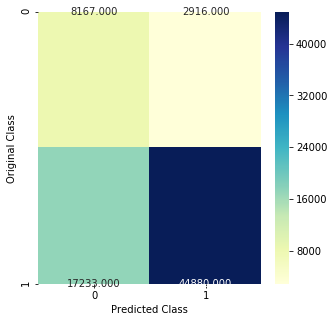

-------------------- Precision matrix (Columm Sum=1) --------------------


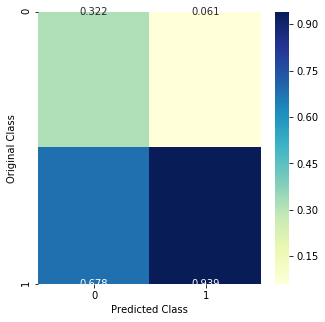

-------------------- Recall matrix (Row sum=1) --------------------


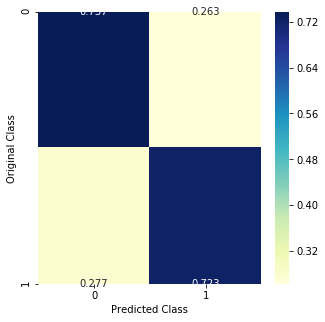

In [85]:
y_predicted= clf.predict_proba(X_train_final)

plot_confusion_matrix(y_train,clf.predict(X_train_final))

## test_data confusion_matrix

-------------------- Confusion matrix --------------------


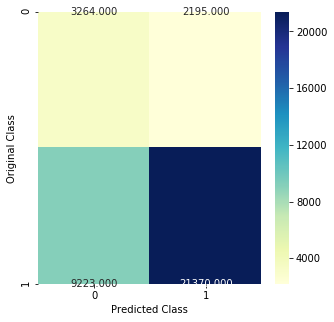

-------------------- Precision matrix (Columm Sum=1) --------------------


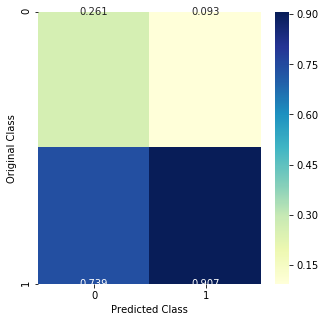

-------------------- Recall matrix (Row sum=1) --------------------


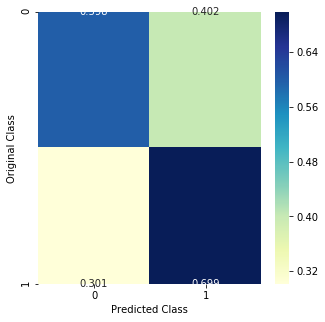

In [86]:
y_predicted= clf.predict_proba(X_test_final)

plot_confusion_matrix(y_test,clf.predict(X_test_final))

#### for testdata

In [110]:
TPR=21370/(21370+9223)
print(TPR)

0.6985258065570555


In [111]:
FPR=2195/(3264+2195)
print(FPR)

0.4020882945594431


## Hyperparameter tuning for TPR and FPR

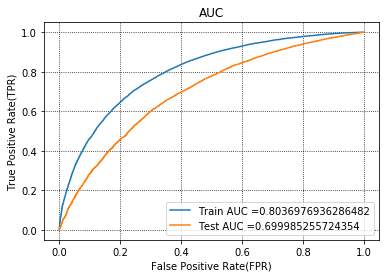

In [87]:
from sklearn.metrics import roc_curve, auc

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred=clf.predict_proba(X_train_final)[:,1]
# y_test_pred = batch_predict(clf, x_test_onehot_bow)
y_test_pred=clf.predict_proba(X_test_final)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

ax = plt.subplot()

auc_set_train=auc(train_fpr, train_tpr)
auc_set_test=auc(test_fpr, test_tpr)


ax.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
ax.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(b=True, which='major', color='k', linestyle=':')
ax.set_facecolor("white")
plt.show()


#### from above figure ,my FPR is very high therefore we can conclude that my base model is not working well...

# Performing Logistic regression for binary classification

In [88]:
from xgboost import XGBClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from scipy.sparse import hstack


warnings.filterwarnings("ignore")
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

In [89]:
lr =LogisticRegression()
prams={'C':[10**i for i in range(-4,5)]}
random_clf = RandomizedSearchCV(lr,prams,scoring='neg_log_loss',cv=5,n_jobs=-1)
random_clf.fit(X_train_final,y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributions={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10,
                                              100, 1000, 10000]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='

In [90]:
random_clf.best_params_

{'C': 1}

#### again training my logistic model on best parameters

In [91]:
x_clf = LogisticRegression(C = 1)
x_clf.fit(X_train_final,y_train)
c_cfl=CalibratedClassifierCV(x_clf,method='sigmoid')
c_cfl.fit(X_train_final,y_train)

CalibratedClassifierCV(base_estimator=LogisticRegression(C=1, class_weight=None,
                                                         dual=False,
                                                         fit_intercept=True,
                                                         intercept_scaling=1,
                                                         l1_ratio=None,
                                                         max_iter=100,
                                                         multi_class='warn',
                                                         n_jobs=None,
                                                         penalty='l2',
                                                         random_state=None,
                                                         solver='warn',
                                                         tol=0.0001, verbose=0,
                                                         warm_start=False),
                       cv='war

## train_data confusion_matrix

train loss 0.3546782871728286
-------------------- Confusion matrix --------------------


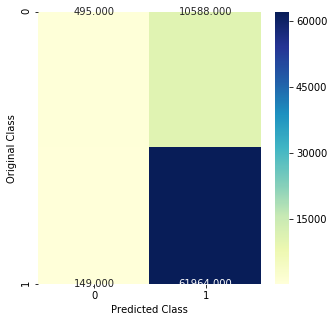

-------------------- Precision matrix (Columm Sum=1) --------------------


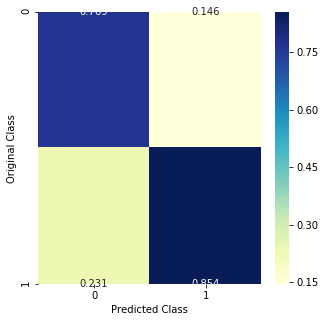

-------------------- Recall matrix (Row sum=1) --------------------


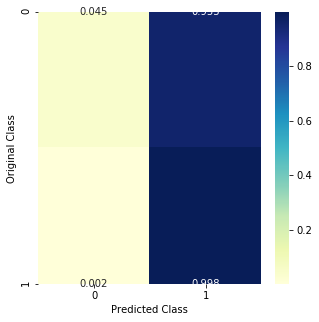

In [92]:
y_predicted= c_cfl.predict_proba(X_train_final)
print ('train loss',log_loss(y_train, y_predicted))
plot_confusion_matrix(y_train,c_cfl.predict(X_train_final))

## test_data confusion_matrix

test loss 0.3838287746467144
-------------------- Confusion matrix --------------------


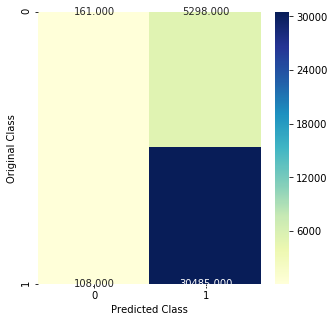

-------------------- Precision matrix (Columm Sum=1) --------------------


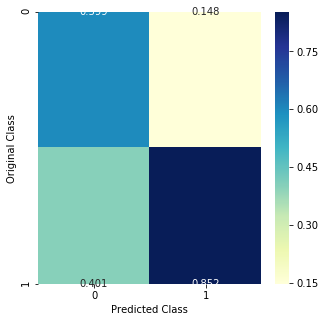

-------------------- Recall matrix (Row sum=1) --------------------


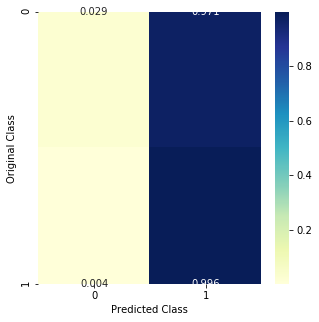

In [93]:
y_predicted= c_cfl.predict_proba(X_test_final)
print ('test loss',log_loss(y_test, y_predicted))
plot_confusion_matrix(y_test,c_cfl.predict(X_test_final))

#### for testdata

In [108]:
TPR1=30485/(30485+108)
print(TPR1)

0.9964697806687804


In [109]:
FPR1=5298/(5298+161)
print(FPR1)

0.9705074189411981


## Hyperparameter tuning for TPR and FPR

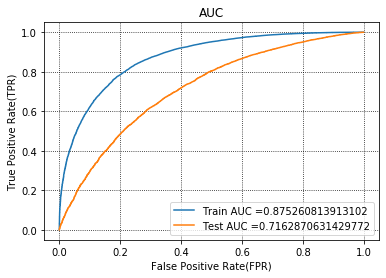

In [112]:
from sklearn.metrics import roc_curve, auc

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred=c_cfl.predict_proba(X_train_final)[:,1]
# y_test_pred = batch_predict(clf, x_test_onehot_bow)
y_test_pred=c_cfl.predict_proba(X_test_final)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

ax = plt.subplot()

auc_set1_train=auc(train_fpr, train_tpr)
auc_set1_test=auc(test_fpr, test_tpr)


ax.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
ax.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(b=True, which='major', color='k', linestyle=':')
ax.set_facecolor("white")
plt.show()


# Performing gbdt for binary  classification

###### Light GBM(Light Gradient Boosting Machine) is almost 7 times faster than XGBOOST and is a much better approach when dealing with large datasets. 

In [113]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import lightgbm as lgb

In [114]:
x_cfl=lgb.LGBMClassifier(boosting_type='gbdt',num_leaves=31)


param_grid = {
 "learning_rate":[0.0001,0.001,0.01,0.1],
 "n_estimators":[5,10,50,75,100,200]
}
random_clf = RandomizedSearchCV(x_cfl,prams,scoring='neg_log_loss',cv=5,n_jobs=-1)
random_clf.fit(X_train_final,y_train)

[LightGBM] [Warning] Unknown parameter: C


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg_lambda=0.0, silent=True,
                                            subsample=1.0,
                                            s

In [97]:
random_clf.best_params_

{'C': 0.0001}

In [98]:
random_clf.get_params

<bound method BaseEstimator.get_params of RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg_lambda=0.0, silent=True,
                                            subsample=1.0,
   

In [99]:
best_dt_clf = random_clf.best_estimator_

In [100]:
print(best_dt_clf)

LGBMClassifier(C=0.0001, boosting_type='gbdt', class_weight=None,
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)


In [101]:
print(random_clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [102]:
learning_rate1=0.1
n_estimators1=100

#### traing my model on best param

In [103]:
x_clf = lgb.LGBMClassifier(boosting_type='gbdt',num_leaves=31,learning_rate=learning_rate1,n_estimators=n_estimators1)
x_clf.fit(X_train_final,y_train)
c_cfl=CalibratedClassifierCV(x_clf,method='sigmoid')
c_cfl.fit(X_train_final,y_train)

CalibratedClassifierCV(base_estimator=LGBMClassifier(boosting_type='gbdt',
                                                     class_weight=None,
                                                     colsample_bytree=1.0,
                                                     importance_type='split',
                                                     learning_rate=0.1,
                                                     max_depth=-1,
                                                     min_child_samples=20,
                                                     min_child_weight=0.001,
                                                     min_split_gain=0.0,
                                                     n_estimators=100,
                                                     n_jobs=-1, num_leaves=31,
                                                     objective=None,
                                                     random_state=None,
                                             

## train_data confusion_matrix

train loss 0.3242224246036929
-------------------- Confusion matrix --------------------


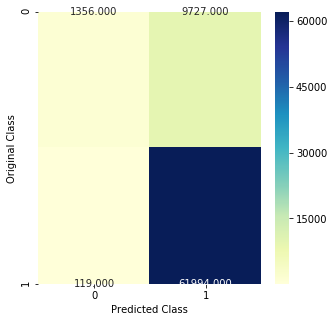

-------------------- Precision matrix (Columm Sum=1) --------------------


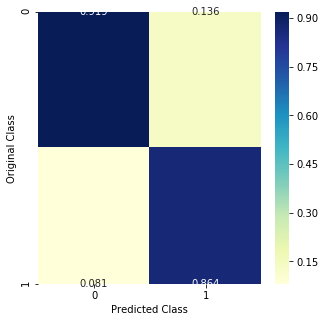

-------------------- Recall matrix (Row sum=1) --------------------


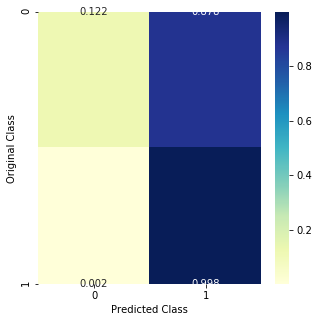

In [104]:
y_predicted= c_cfl.predict_proba(X_train_final)
print ('train loss',log_loss(y_train, y_predicted))
plot_confusion_matrix(y_train,c_cfl.predict(X_train_final))

## test_data confusion_matrix

test loss 0.3872234790356119
-------------------- Confusion matrix --------------------


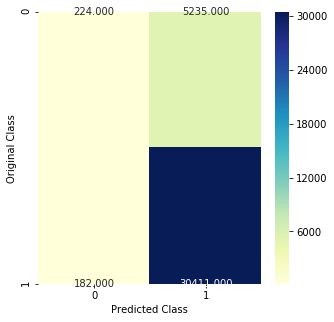

-------------------- Precision matrix (Columm Sum=1) --------------------


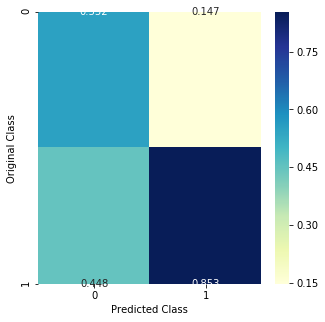

-------------------- Recall matrix (Row sum=1) --------------------


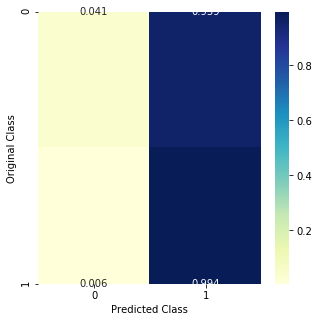

In [105]:
y_predicted= c_cfl.predict_proba(X_test_final)
print ('test loss',log_loss(y_test, y_predicted))
plot_confusion_matrix(y_test,c_cfl.predict(X_test_final))

#### for testdata

In [158]:
TPR2=30411/(30411+182)

In [159]:
FPR2=5235/(5235+224)

## Hyperparameter tuning for TPR and FPR

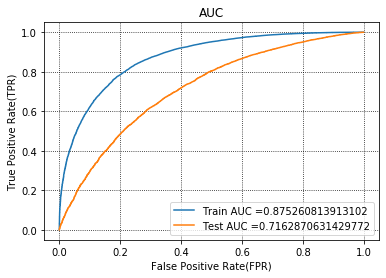

In [115]:
from sklearn.metrics import roc_curve, auc

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred=c_cfl.predict_proba(X_train_final)[:,1]
# y_test_pred = batch_predict(clf, x_test_onehot_bow)
y_test_pred=c_cfl.predict_proba(X_test_final)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

ax = plt.subplot()

auc_set2_train=auc(train_fpr, train_tpr)
auc_set2_test=auc(test_fpr, test_tpr)


ax.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
ax.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(b=True, which='major', color='k', linestyle=':')
ax.set_facecolor("white")
plt.show()


## Performing Randomforest for binary classification

In [116]:
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
n_estimators=[50,100,200,500]
max_depth=[3,5,10,20]
train_auc=[]
test_auc=[]
for estimator in tqdm(n_estimators):
    temp_tr=[]
    temp_te=[]
    for depth in max_depth:
        clf=RandomForestClassifier(n_estimators=estimator,max_depth=depth,n_jobs=-1)
        clf.fit(X_train_final,y_train)
        y_train_pred=clf.predict_proba(X_train_final)[:,1]
        y_test_pred=clf.predict_proba(X_test_final)[:,1]
        temp_tr.append(roc_auc_score(y_train,y_train_pred))
        temp_te.append(roc_auc_score(y_test,y_test_pred))
    train_auc.append(temp_tr)
    test_auc.append(temp_te)
    
        

100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [09:32<00:00, 143.19s/it]


In [117]:
print(train_auc)
print(test_auc)

[[0.6730847698582394, 0.6944166889155328, 0.7889446432005616, 0.9257297909761637], [0.6911772434606502, 0.7255486012700212, 0.8100412922384294, 0.9487565447913411], [0.6954401275543968, 0.7269038063786608, 0.8278781275282463, 0.9604017690460017], [0.7107662088204888, 0.7404586973903958, 0.8369806896364003, 0.9704010234167039]]
[[0.6392648329559613, 0.6428109318433105, 0.6470078769723844, 0.6486142659237772], [0.6572399246506678, 0.6636725340448972, 0.6584574081832777, 0.6662436659088211], [0.6558886384931446, 0.6593389540774675, 0.6673698749264005, 0.6731830199618895], [0.6673557168530717, 0.6715151546142741, 0.6743267491835546, 0.6803722225439317]]


# set 2

## categorical(instead of one hot encoding, try response coding: use probability values), numerical features + eassay (TFIDF W2V)

In [118]:
#please use below code to load glove vectors 
import pickle
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [119]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train["essay"])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [120]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train["essay"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train.append(vector)

print(len(tfidf_w2v_vectors_train))
print(len(tfidf_w2v_vectors_train[0]))

100%|███████████████████████████████████████████████████████████████████████████| 73196/73196 [12:03<00:00, 101.14it/s]

73196
300


In [121]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_test["essay"])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [122]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test["essay"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)

print(len(tfidf_w2v_vectors_test))
print(len(tfidf_w2v_vectors_test[0]))

100%|████████████████████████████████████████████████████████████████████████████| 36052/36052 [06:04<00:00, 98.93it/s]

36052
300


## concatinating tfidfw2v(essay) in perivious feature

In [123]:
from scipy.sparse import hstack#stacking it horizentally
X_train_final=hstack((X_train_essay_tfidf ,X_train_school_state,X_train_teacher_prefix,X_train_project_categories,X_train_project_subcategories,X_train_price_norm,X_train_posted_projects,tfidf_w2v_vectors_train)).tocsr()


X_test_final=hstack((X_test_essay_tfidf ,X_test_school_state,X_test_teacher_prefix,X_test_project_categories,X_test_project_subcategories,X_test_price_norm,X_test_posted_projects,tfidf_w2v_vectors_test)).tocsr()

print(X_train_final.shape,y_train.shape)
print(X_test_final.shape,y_test.shape)

(73196, 14966) (73196,)
(36052, 14966) (36052,)


## again Performing Logistic regression for binary classification for set2

In [124]:
lr =LogisticRegression()
prams={'C':[10**i for i in range(-4,5)]}
random_clf = RandomizedSearchCV(lr,prams,scoring='neg_log_loss',cv=5,n_jobs=-1)
random_clf.fit(X_train_final,y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributions={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10,
                                              100, 1000, 10000]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='

In [125]:
best_pram=random_clf.best_params_
print(best_pram)

{'C': 1}


#### traing my model on best param

In [126]:
x_clf = LogisticRegression(C =1)
x_clf.fit(X_train_final,y_train)
c_cfl=CalibratedClassifierCV(x_clf,method='sigmoid')
c_cfl.fit(X_train_final,y_train)

CalibratedClassifierCV(base_estimator=LogisticRegression(C=1, class_weight=None,
                                                         dual=False,
                                                         fit_intercept=True,
                                                         intercept_scaling=1,
                                                         l1_ratio=None,
                                                         max_iter=100,
                                                         multi_class='warn',
                                                         n_jobs=None,
                                                         penalty='l2',
                                                         random_state=None,
                                                         solver='warn',
                                                         tol=0.0001, verbose=0,
                                                         warm_start=False),
                       cv='war

## train_data confusion_matrix

train loss 0.3540272724296529
-------------------- Confusion matrix --------------------


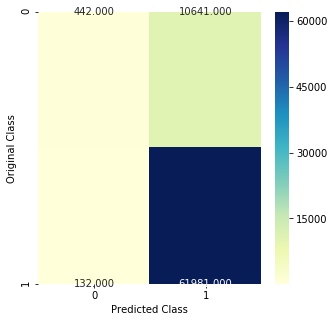

-------------------- Precision matrix (Columm Sum=1) --------------------


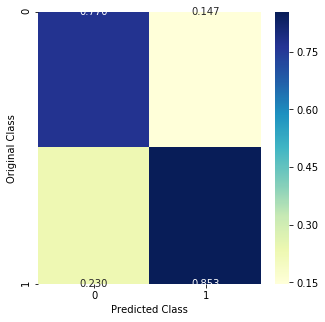

-------------------- Recall matrix (Row sum=1) --------------------


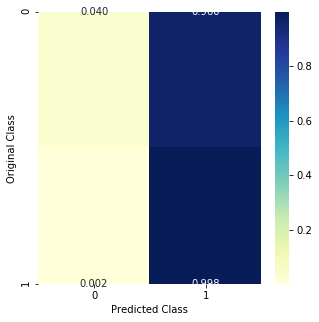

In [127]:
y_predicted= c_cfl.predict_proba(X_train_final)
print ('train loss',log_loss(y_train, y_predicted))
plot_confusion_matrix(y_train,c_cfl.predict(X_train_final))

## test_data confusion_matrix

test loss 0.38260612644726716
-------------------- Confusion matrix --------------------


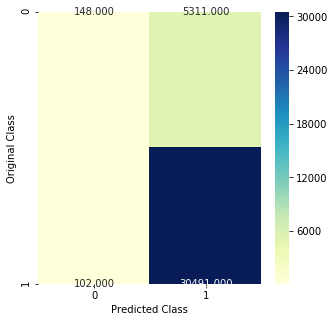

-------------------- Precision matrix (Columm Sum=1) --------------------


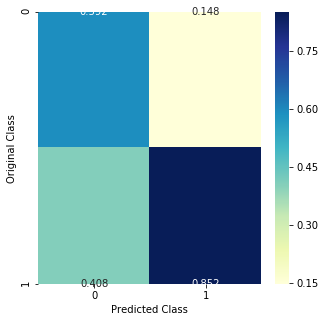

-------------------- Recall matrix (Row sum=1) --------------------


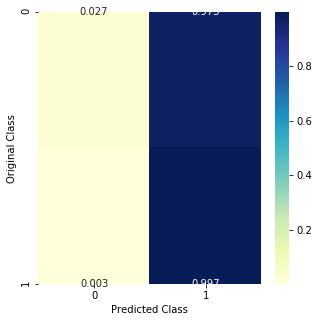

In [128]:
y_predicted= c_cfl.predict_proba(X_test_final)
print ('test loss',log_loss(y_test, y_predicted))
plot_confusion_matrix(y_test,c_cfl.predict(X_test_final))

#### for testdata

In [160]:
TPR3=30491/(30491+102)

In [161]:
FPR3=5311/(5311+148)

## Hyperparameter tuning for TPR and FPR

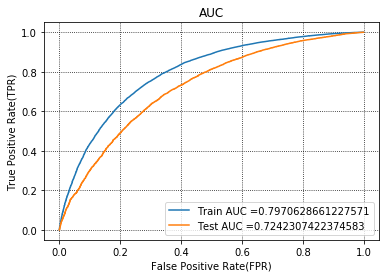

In [131]:
from sklearn.metrics import roc_curve, auc

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred=c_cfl.predict_proba(X_train_final)[:,1]
# y_test_pred = batch_predict(clf, x_test_onehot_bow)
y_test_pred=c_cfl.predict_proba(X_test_final)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

ax = plt.subplot()

auc_set3_train=auc(train_fpr, train_tpr)
auc_set3_test=auc(test_fpr, test_tpr)


ax.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
ax.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(b=True, which='major', color='k', linestyle=':')
ax.set_facecolor("white")
plt.show()


## Performing gbdt for binary classification for set 2:

In [132]:
x_cfl=lgb.LGBMClassifier(boosting_type='gbdt',num_leaves=31)


param_grid = {
 "learning_rate":[0.0001,0.001,0.01,0.1],
 "n_estimators":[5,10,50,75,100,200]
}
random_clf = RandomizedSearchCV(x_cfl,prams,scoring='neg_log_loss',cv=5,n_jobs=-1)
random_clf.fit(X_train_final,y_train)

[LightGBM] [Warning] Unknown parameter: C


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg_lambda=0.0, silent=True,
                                            subsample=1.0,
                                            s

In [133]:
best_dt_clf = random_clf.best_estimator_

In [134]:
print(best_dt_clf)

LGBMClassifier(C=0.0001, boosting_type='gbdt', class_weight=None,
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)


In [135]:
learning_rate2=0.1
n_estimators2=100

#### traing my model on best param

In [136]:
x_clf = lgb.LGBMClassifier(boosting_type='gbdt',num_leaves=31,learning_rate=learning_rate2,n_estimators=n_estimators2)
x_clf.fit(X_train_final,y_train)
c_cfl=CalibratedClassifierCV(x_clf,method='sigmoid')
c_cfl.fit(X_train_final,y_train)

CalibratedClassifierCV(base_estimator=LGBMClassifier(boosting_type='gbdt',
                                                     class_weight=None,
                                                     colsample_bytree=1.0,
                                                     importance_type='split',
                                                     learning_rate=0.1,
                                                     max_depth=-1,
                                                     min_child_samples=20,
                                                     min_child_weight=0.001,
                                                     min_split_gain=0.0,
                                                     n_estimators=100,
                                                     n_jobs=-1, num_leaves=31,
                                                     objective=None,
                                                     random_state=None,
                                             

## train_data confusion_matrix

train loss 0.3157280233802238
-------------------- Confusion matrix --------------------


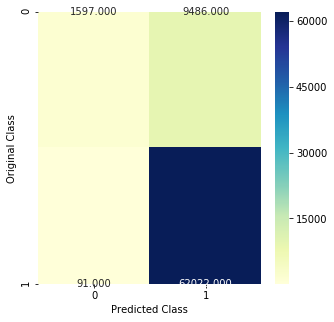

-------------------- Precision matrix (Columm Sum=1) --------------------


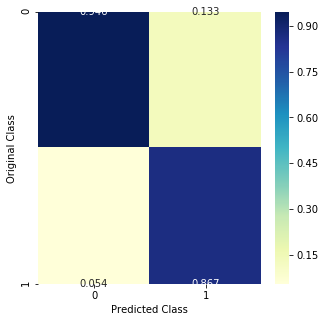

-------------------- Recall matrix (Row sum=1) --------------------


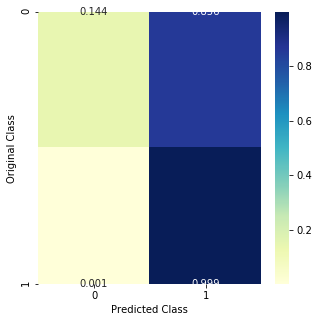

In [137]:
y_predicted= c_cfl.predict_proba(X_train_final)
print ('train loss',log_loss(y_train, y_predicted))
plot_confusion_matrix(y_train,c_cfl.predict(X_train_final))

## test_data confusion_matrix

test loss 0.3860290042551005
-------------------- Confusion matrix --------------------


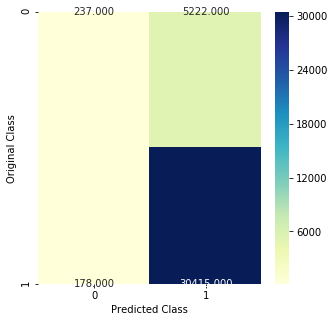

-------------------- Precision matrix (Columm Sum=1) --------------------


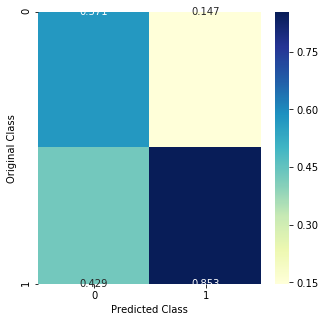

-------------------- Recall matrix (Row sum=1) --------------------


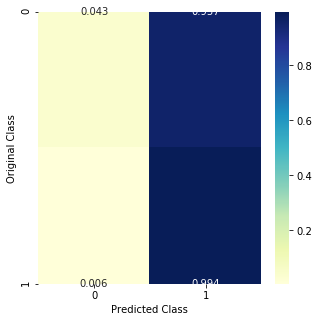

In [138]:
y_predicted= c_cfl.predict_proba(X_test_final)
print ('test loss',log_loss(y_test, y_predicted))
plot_confusion_matrix(y_test,c_cfl.predict(X_test_final))

#### for testdata

In [162]:
TPR4=30415/(30415+178)

In [163]:
FPR4=5222/(5222+237)

## Hyperparameter tuning for TPR and FPR

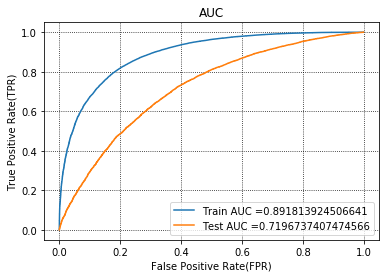

In [141]:
from sklearn.metrics import roc_curve, auc

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred=c_cfl.predict_proba(X_train_final)[:,1]
# y_test_pred = batch_predict(clf, x_test_onehot_bow)
y_test_pred=c_cfl.predict_proba(X_test_final)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

ax = plt.subplot()

auc_set4_train=auc(train_fpr, train_tpr)
auc_set4_test=auc(test_fpr, test_tpr)


ax.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
ax.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(b=True, which='major', color='k', linestyle=':')
ax.set_facecolor("white")
plt.show()


# Trying to get important feature and leaving non important feature

##### Select all  non-zero feature importance.Trying to get the feature importance using 'feature_importances_ , applying any model(Dession tree, Logistic Regression, Linear SVM).

In [142]:
#for whole data
#clf22 is my decion tree model   train(X_train_onehot, y_train) with my best parameters

nonzero_index=np.nonzero(x_clf.feature_importances_)[0] #getting index of nonzero feature
X_train_new=X_train_final[:,nonzero_index]
X_test_new=X_test_final[:,nonzero_index]

print(X_train_new.shape)
print(X_test_new.shape)
print(y_train.shape)
print(y_test.shape)
# print(clf22.tree_.compute_feature_importances(normalize=False))

(73196, 1165)
(36052, 1165)
(73196,)
(36052,)


## Performing Logistic regression for binary classification

In [143]:
lr =LogisticRegression()
prams={'C':[10**i for i in range(-4,5)]}
random_clf = RandomizedSearchCV(lr,prams,scoring='neg_log_loss',cv=5,n_jobs=-1)
random_clf.fit(X_train_new,y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributions={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10,
                                              100, 1000, 10000]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='

In [144]:
best_pram=random_clf.best_params_
print(best_pram)

{'C': 1}


#### traing my model on best param

In [145]:
x_clf = LogisticRegression(C =10 )
x_clf.fit(X_train_new,y_train)
c_cfl=CalibratedClassifierCV(x_clf,method='sigmoid')
c_cfl.fit(X_train_new,y_train)

CalibratedClassifierCV(base_estimator=LogisticRegression(C=10,
                                                         class_weight=None,
                                                         dual=False,
                                                         fit_intercept=True,
                                                         intercept_scaling=1,
                                                         l1_ratio=None,
                                                         max_iter=100,
                                                         multi_class='warn',
                                                         n_jobs=None,
                                                         penalty='l2',
                                                         random_state=None,
                                                         solver='warn',
                                                         tol=0.0001, verbose=0,
                                                

## train_data confusion_matrix

train loss 0.36644999092056396
-------------------- Confusion matrix --------------------


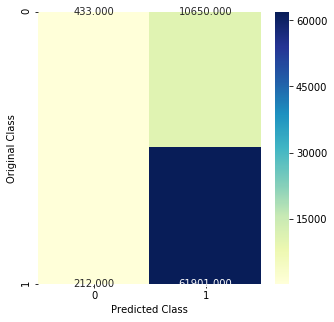

-------------------- Precision matrix (Columm Sum=1) --------------------


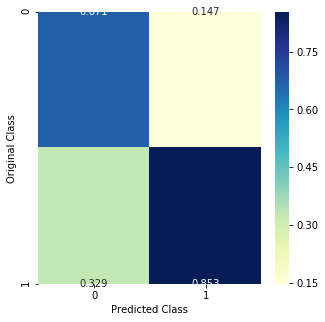

-------------------- Recall matrix (Row sum=1) --------------------


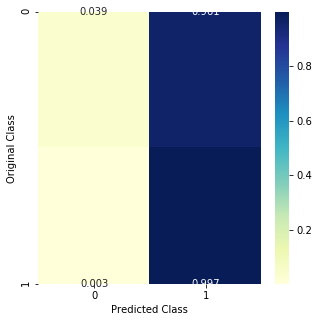

In [146]:
y_predicted= c_cfl.predict_proba(X_train_new)
print ('train loss',log_loss(y_train, y_predicted))
plot_confusion_matrix(y_train,c_cfl.predict(X_train_new))

## test_data confusion_matrix

test loss 0.38733225961025053
-------------------- Confusion matrix --------------------


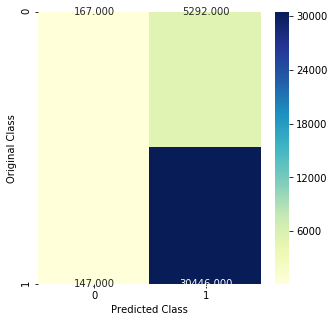

-------------------- Precision matrix (Columm Sum=1) --------------------


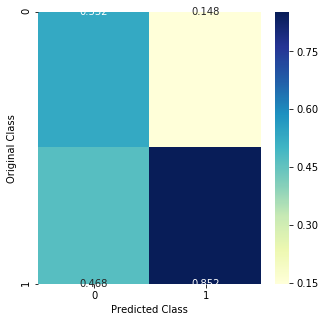

-------------------- Recall matrix (Row sum=1) --------------------


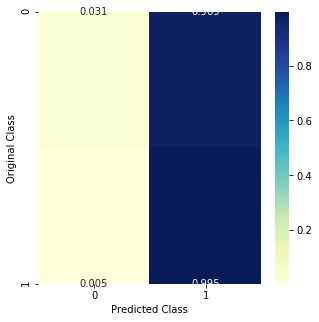

In [147]:
y_predicted= c_cfl.predict_proba(X_test_new)
print ('test loss',log_loss(y_test, y_predicted))
plot_confusion_matrix(y_test,c_cfl.predict(X_test_new))

#### for testdata

In [164]:
TPR5=30446/(30446+147)

In [165]:
FPR5=5292/(5292+167)

## Hyperparameter tuning for TPR and FPR

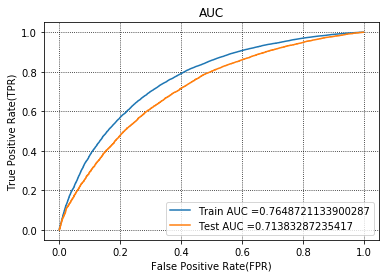

In [150]:
from sklearn.metrics import roc_curve, auc

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred=c_cfl.predict_proba(X_train_new)[:,1]
# y_test_pred = batch_predict(clf, x_test_onehot_bow)
y_test_pred=c_cfl.predict_proba(X_test_new)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

ax = plt.subplot()

auc_set5_train=auc(train_fpr, train_tpr)
auc_set5_test=auc(test_fpr, test_tpr)


ax.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
ax.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(b=True, which='major', color='k', linestyle=':')
ax.set_facecolor("white")
plt.show()


## Performing gbdt for binary classification

In [151]:
x_cfl=lgb.LGBMClassifier(boosting_type='gbdt',num_leaves=31)


param_grid = {
 "learning_rate":[0.0001,0.001,0.01,0.1],
 "n_estimators":[5,10,50,75,100,200]
}
random_clf = RandomizedSearchCV(x_cfl,prams,scoring='neg_log_loss',cv=5,n_jobs=-1)
random_clf.fit(X_train_new,y_train)

[LightGBM] [Warning] Unknown parameter: C


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg_lambda=0.0, silent=True,
                                            subsample=1.0,
                                            s

In [152]:
random_clf.best_params_

{'C': 0.0001}

In [153]:
random_clf.get_params

<bound method BaseEstimator.get_params of RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg_lambda=0.0, silent=True,
                                            subsample=1.0,
   

In [154]:
best_dt_clf = random_clf.best_estimator_

In [155]:
print(best_dt_clf)

LGBMClassifier(C=0.0001, boosting_type='gbdt', class_weight=None,
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)


In [156]:
print(random_clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [157]:
learning_rate1=0.1
n_estimators1=100

#### traing my model on best param

In [159]:
x_clf = lgb.LGBMClassifier(boosting_type='gbdt',num_leaves=31,learning_rate=learning_rate1,n_estimators=n_estimators1)
x_clf.fit(X_train_new,y_train)
c_cfl=CalibratedClassifierCV(x_clf,method='sigmoid')
c_cfl.fit(X_train_new,y_train)

CalibratedClassifierCV(base_estimator=LGBMClassifier(boosting_type='gbdt',
                                                     class_weight=None,
                                                     colsample_bytree=1.0,
                                                     importance_type='split',
                                                     learning_rate=0.1,
                                                     max_depth=-1,
                                                     min_child_samples=20,
                                                     min_child_weight=0.001,
                                                     min_split_gain=0.0,
                                                     n_estimators=100,
                                                     n_jobs=-1, num_leaves=31,
                                                     objective=None,
                                                     random_state=None,
                                             

## train_data confusion_matrix

train loss 0.3171890978927454
-------------------- Confusion matrix --------------------


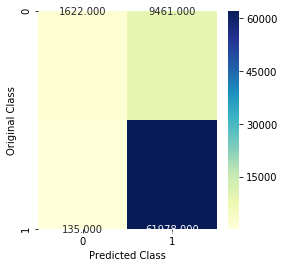

-------------------- Precision matrix (Columm Sum=1) --------------------


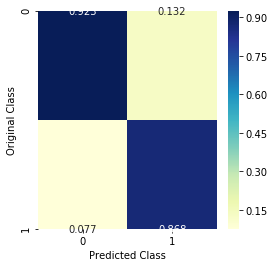

-------------------- Recall matrix (Row sum=1) --------------------


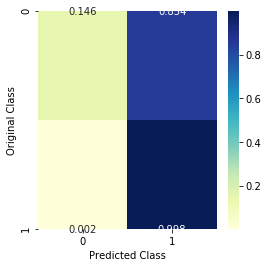

In [160]:
y_predicted= c_cfl.predict_proba(X_train_new)
print ('train loss',log_loss(y_train, y_predicted))
plot_confusion_matrix(y_train,c_cfl.predict(X_train_new))

## test_data confusion_matrix

test loss 0.38454565450015965
-------------------- Confusion matrix --------------------


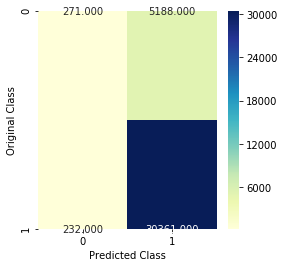

-------------------- Precision matrix (Columm Sum=1) --------------------


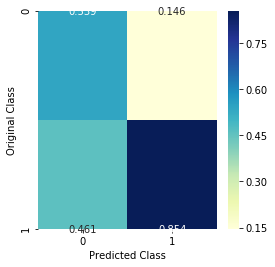

-------------------- Recall matrix (Row sum=1) --------------------


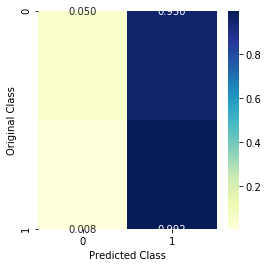

In [161]:
y_predicted= c_cfl.predict_proba(X_test_new)
print ('test loss',log_loss(y_test, y_predicted))
plot_confusion_matrix(y_test,c_cfl.predict(X_test_new))

#### for test data

In [166]:
TPR6=30361/(30361+232)

In [167]:
FPR6=5188/(5188+271)

## Hyperparameter tuning for TPR and FPR

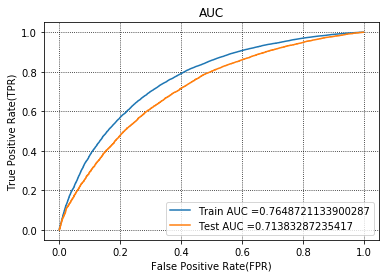

In [168]:
from sklearn.metrics import roc_curve, auc

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred=c_cfl.predict_proba(X_train_new)[:,1]
# y_test_pred = batch_predict(clf, x_test_onehot_bow)
y_test_pred=c_cfl.predict_proba(X_test_new)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

ax = plt.subplot()

auc_set6_train=auc(train_fpr, train_tpr)
auc_set6_test=auc(test_fpr, test_tpr)


ax.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
ax.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(b=True, which='major', color='k', linestyle=':')
ax.set_facecolor("white")
plt.show()


# Summery

In [170]:
from prettytable import PrettyTable
from sklearn.metrics import roc_curve, auc    
x = PrettyTable()

x.field_names = [ "Model", "TPR","FPR", "Train_AUC", "Test_AUC"]


x.add_row(["--set1--", "--set1--","--set1--", "--set1--","--set1--"])
x.add_row([ "base model:Naive Bais", round(TPR,3),round(FPR,3), round(auc_set_train,4),round(auc_set_test,4)])
x.add_row([ "Logistic regression", round(TPR1,3),round(FPR1,3), round(auc_set1_train,4),round(auc_set1_test,4)])
x.add_row([ "Light gbm",TPR2,FPR2, round(auc_set2_train,4),round(auc_set2_test,4)])

x.add_row(["-------------","-------------","-------------","-------------","-------------"])

x.add_row([ "--set2--", "--set2--","--set2--", "--set2--","--set2--"])
x.add_row([ "Logistic regression",TPR3,FPR3, round(auc_set3_train,4),round(auc_set3_test,4)])
x.add_row([ "Light gbm",TPR4,FPR4, round(auc_set4_train,4),round(auc_set4_test,4)])
x.add_row(["-------------","-------------","-------------","-------------","-------------"])

x.add_row(["--important features set--", "--set--", "--set--","--set--", "--set--"])

x.add_row(["Logistic reg",TPR5,FPR5, round(auc_set5_train,4),round(auc_set5_test,4)])
x.add_row([ "Light gbm",TPR6,FPR6, round(auc_set6_train,4),round(auc_set6_test,4)])


print('summary :------> ')
print(" \n")
print(x)

summary :------> 
 

+----------------------------+--------------------+--------------------+---------------+---------------+
|           Model            |        TPR         |        FPR         |   Train_AUC   |    Test_AUC   |
+----------------------------+--------------------+--------------------+---------------+---------------+
|          --set1--          |      --set1--      |      --set1--      |    --set1--   |    --set1--   |
|   base model:Naive Bais    |       0.699        |       0.402        |     0.8037    |      0.7      |
|    Logistic regression     |       0.996        |       0.971        |     0.8753    |     0.7163    |
|         Light gbm          | 0.9940509266825744 | 0.9589668437442755 |     0.8753    |     0.7163    |
|       -------------        |   -------------    |   -------------    | ------------- | ------------- |
|          --set2--          |      --set2--      |      --set2--      |    --set2--   |    --set2--   |
|    Logistic regression     | 0.9